# Import Library

In [ ]:
# Import required libraries
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Pandas display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Load Dataset

In [ ]:
train_data = pd.read_csv('../Dataset/train.csv')
test_data = pd.read_csv('../Dataset/test.csv')
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [ ]:
train_data = train_data.select_dtypes(include= ['float64','int64'])
test_data = test_data.select_dtypes(include= ['float64','int64'])

In [ ]:
train_data.isnull().sum()

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

# EDA

## Handle missing Values

In [ ]:
# Check for missing values and fill with median
train_data = train_data.apply(lambda col: col.fillna(col.median()))
test_data = test_data.apply(lambda col: col.fillna(col.median()))

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1460 non-null   float64
 9   BsmtFinSF1     1460 non-null   int64  
 10  BsmtFinSF2     1460 non-null   int64  
 11  BsmtUnfSF      1460 non-null   int64  
 12  TotalBsmtSF    1460 non-null   int64  
 13  1stFlrSF       1460 non-null   int64  
 14  2ndFlrSF       1460 non-null   int64  
 15  LowQualFinSF   1460 non-null   int64  
 16  GrLivArea      1460 non-null   int64  
 17  BsmtFullBath   1460 non-null   int64  
 18  BsmtHalf

array([[<Axes: title={'center': 'Id'}>,
        <Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>],
       [<Axes: title={'center': 'YearBuilt'}>,
        <Axes: title={'center': 'YearRemodAdd'}>,
        <Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtFinSF2'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>],
       [<Axes: title={'center': 'TotalBsmtSF'}>,
        <Axes: title={'center': '1stFlrSF'}>,
        <Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'LowQualFinSF'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BsmtFullBath'}>],
       [<Axes: title={'center': 'BsmtHalfBath'}>,
        <Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'HalfBath'}>,

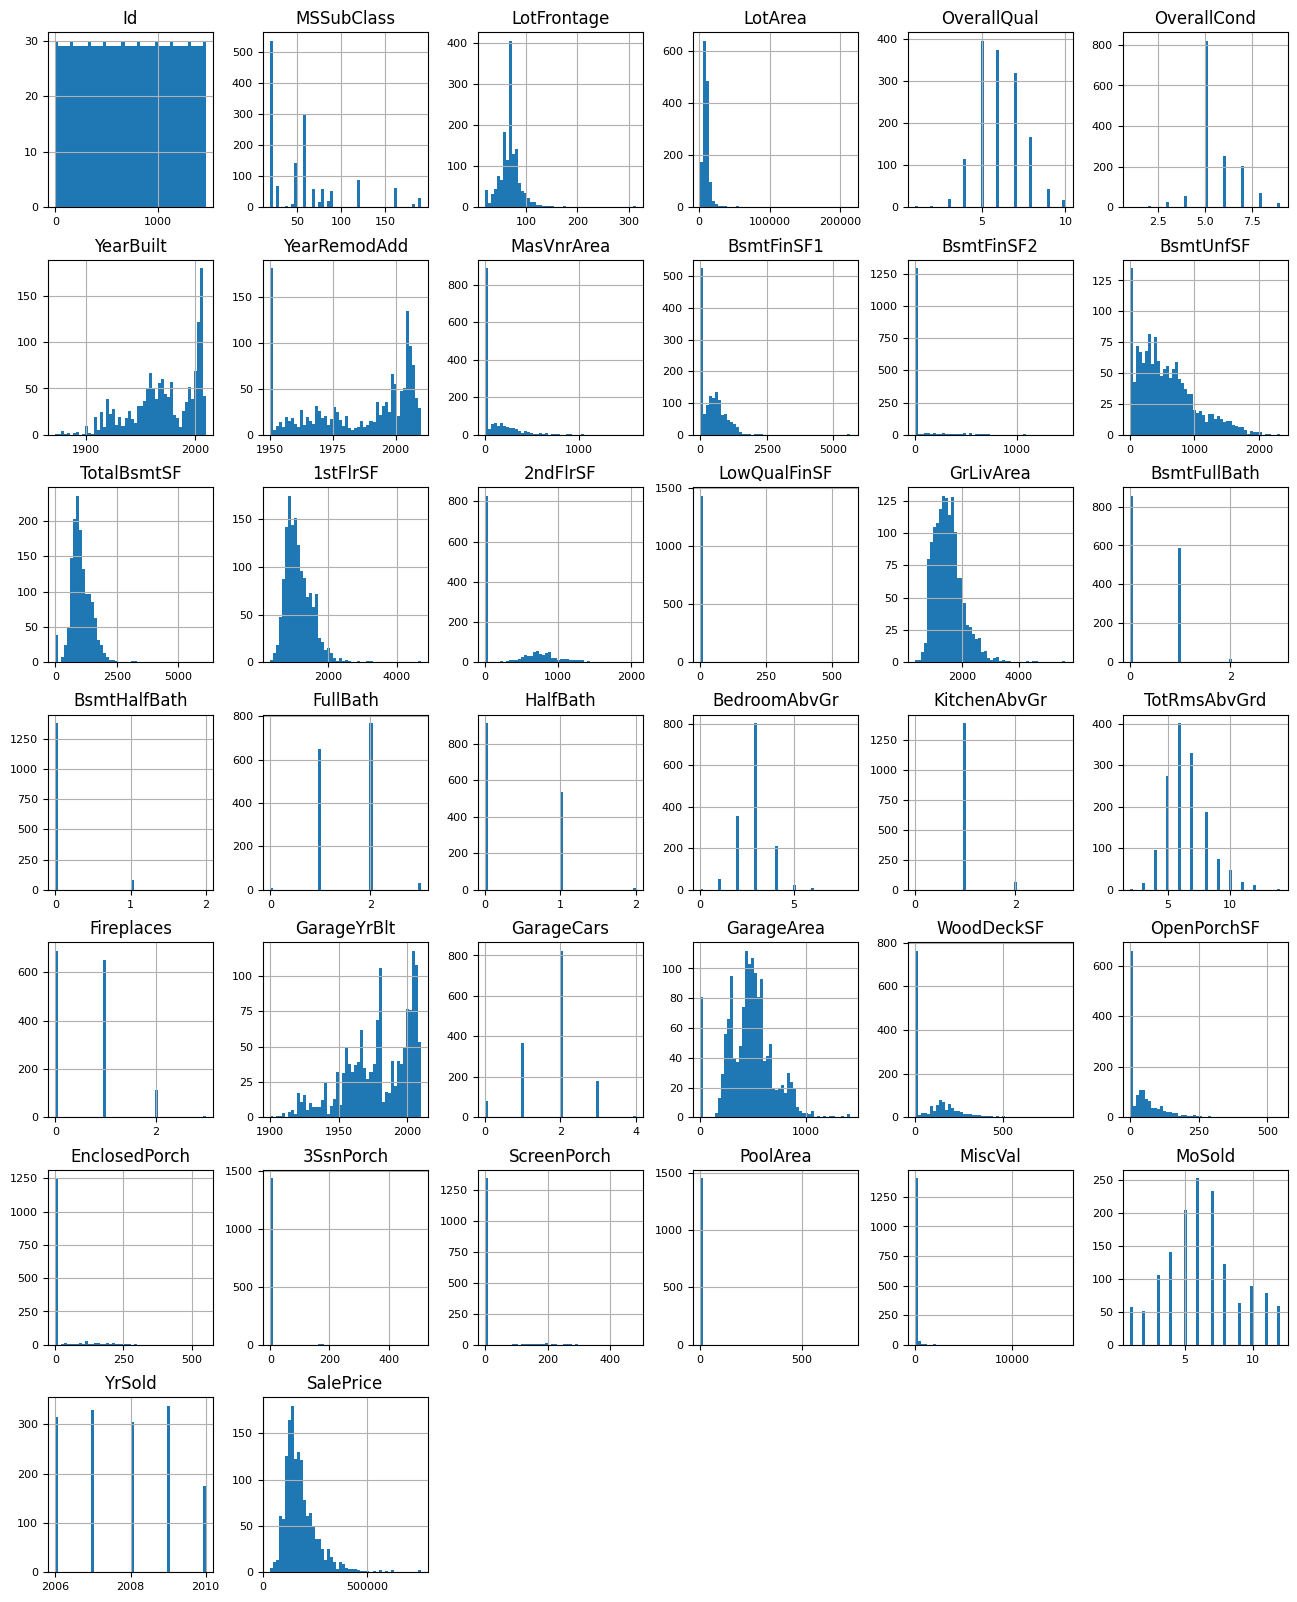

In [ ]:
train_data.hist(figsize=(16,20), bins=50, xlabelsize=8, ylabelsize=8)

## Correlation Analysis

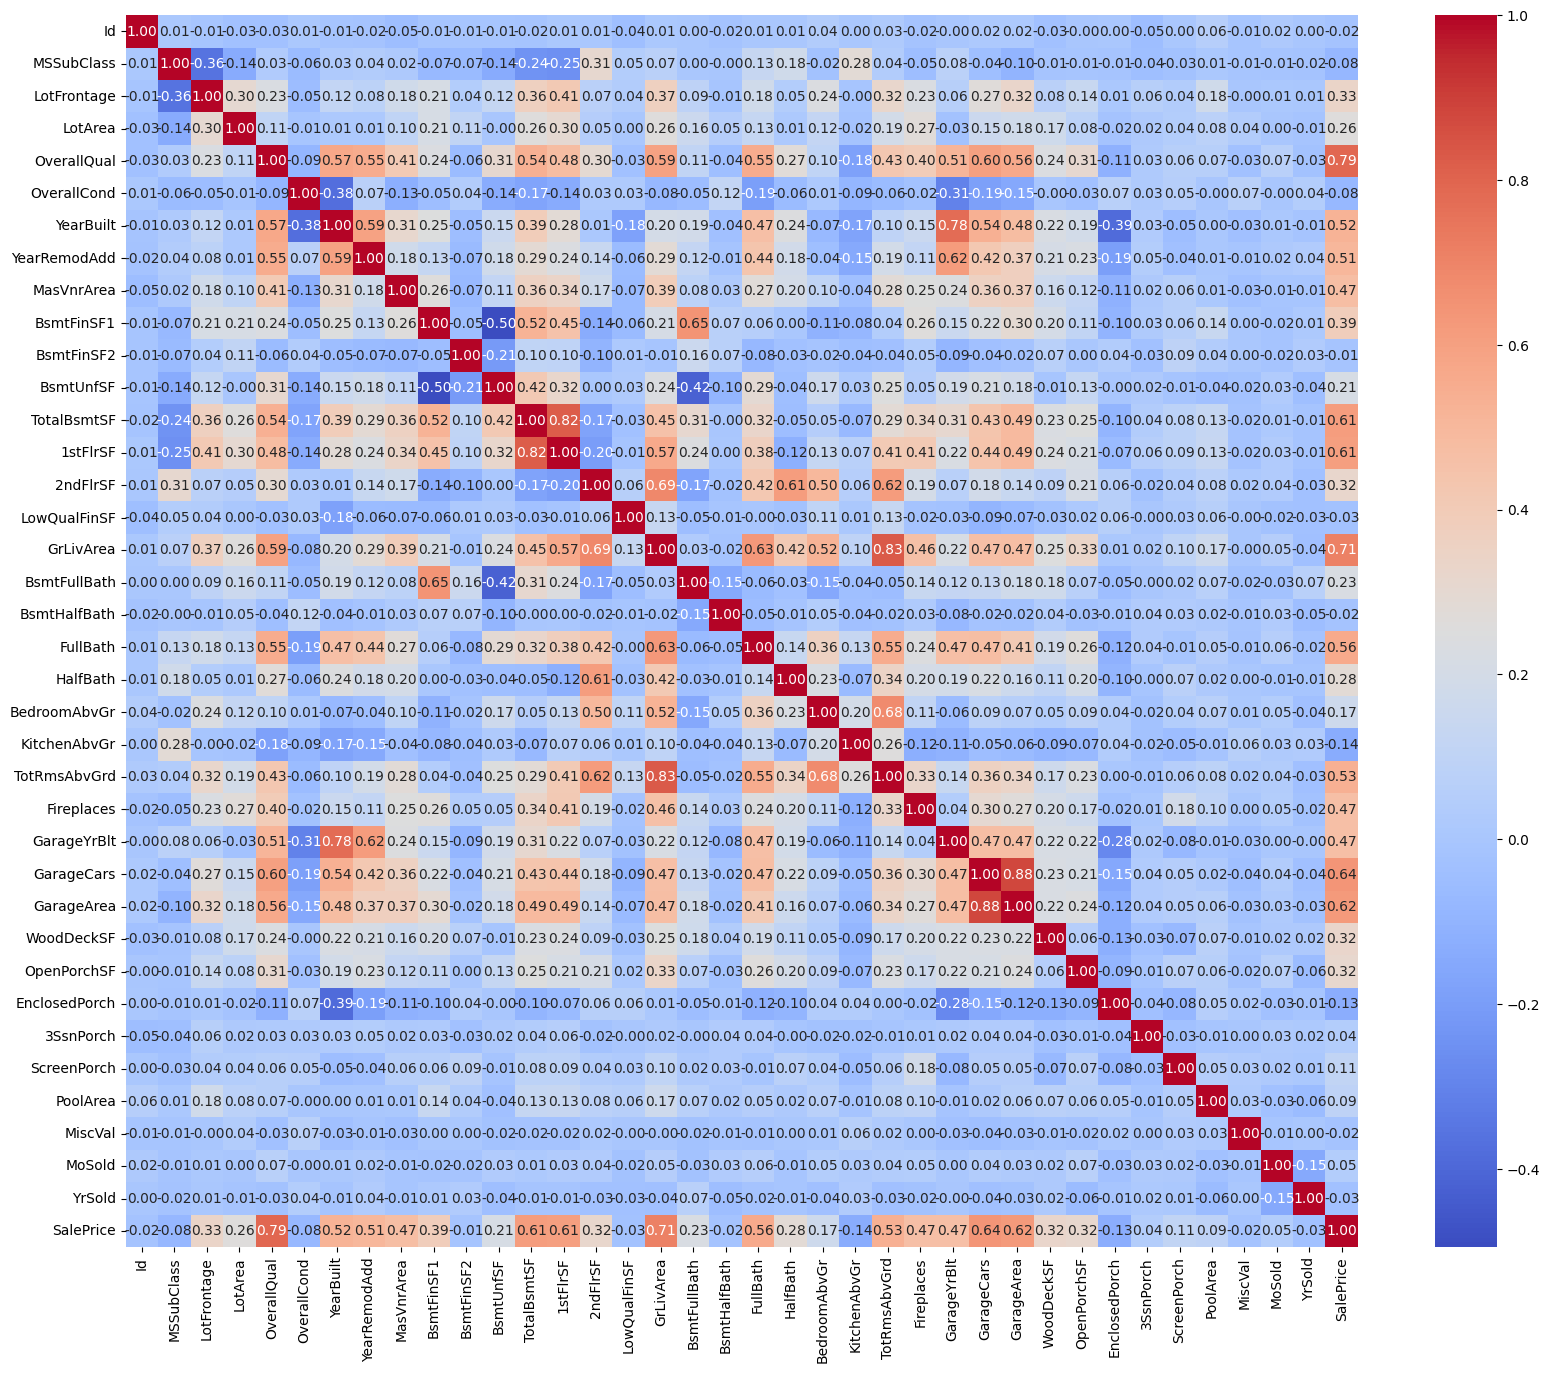

In [ ]:
corr = train_data.corr()

plt.figure(figsize=(20,16))
sns.heatmap(data=corr, annot=True, cmap='coolwarm', square=True, fmt='.2f')
plt.show()


In [ ]:
corr_with_target = train_data.corr()['SalePrice'].sort_values(ascending=False)
corr_with_target

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.472614
Fireplaces       0.466929
GarageYrBlt      0.466754
BsmtFinSF1       0.386420
LotFrontage      0.334771
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [ ]:
selected_feature = [
    'OverallQual',
    'GrLivArea',
    'TotalBsmtSF',
    'YearRemodAdd',
    'GarageCars',
    'GarageArea',
    'FullBath',
    '1stFlrSF',
    'TotRmsAbvGrd',
    'YearBuilt'
]

# Modeling

In [ ]:
# Define features (X) and target (y)
X_train = train_data[selected_feature]
y_train = train_data['SalePrice']
X_test = test_data[selected_feature]

## Gradien Boosting Regressor

In [ ]:
# Train a Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)


GradientBoostingRegressor(random_state=42)

In [ ]:
# Predict using the model
predictions = gb_model.predict(X_test)

# Output predictions
print("Predictions:\n", predictions)

Predictions:
 [121560.80070395 143170.99825675 161933.71037704 ... 158259.95018165
 113806.03309079 243676.74004235]


In [ ]:
y_pred_gb = gb_model.predict(X_test)

In [ ]:
mse_gb = mean_squared_error(y_train, gb_model.predict(X_train))
r2_gb = r2_score(y_train, gb_model.predict(X_train))
rmse_gb = np.sqrt(mean_squared_error(y_train, gb_model.predict(X_train)))

print('GradientBoostingRegressor _ MSE  : %.3f' % mse_gb)
print('GradientBoostingRegressor _ R2   : %.3f' % r2_gb)
print('GradientBoostingRegressor _ RMSE : %.3f' % rmse_gb)

GradientBoostingRegressor _ MSE  : 427219412.815
GradientBoostingRegressor _ R2   : 0.932
GradientBoostingRegressor _ RMSE : 20669.287


In [ ]:
# from sklearn.ensemble import GradientBoostingRegressor
# from sklearn.tree import plot_tree
# import matplotlib.pyplot as plt

# # Assuming your model is named 'gb_model' and fitted
# # Access an individual tree
# tree_index = 0  # Index of the tree you want to plot
# estimator = gb_model.estimators_[tree_index, 0]  # Get the first tree in the model

# # Plot the tree
# plt.figure(figsize=(20, 10))
# plot_tree(estimator, feature_names=X_train.columns.tolist(), filled=True, fontsize=10)
# plt.show()


### Predict on Test Data

In [ ]:
gb_output = pd.DataFrame({
    "Id": test_data["Id"],
    'SalePrice' : y_pred_gb
})
print(gb_output.head())

     Id      SalePrice
0  1461  121560.800704
1  1462  143170.998257
2  1463  161933.710377
3  1464  178107.744601
4  1465  205933.860946


## XGB Regressor

In [ ]:
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
y_pred_xgb = xgb_model.predict(X_test)

In [ ]:
mse_xgb = mean_squared_error(y_train, xgb_model.predict(X_train))
r2_xgb = r2_score(y_train, xgb_model.predict(X_train))
rmse_xgb = np.sqrt(mean_squared_error(y_train, xgb_model.predict(X_train)))

print('XGB Regressor _ MSE  : %.3f' % mse_xgb)
print('XGB Regressor _ R2   : %.3f' % r2_xgb)
print('XGB Regressor _ RMSE : %.3f' % rmse_xgb)

XGB Regressor _ MSE  : 21633087.183
XGB Regressor _ R2   : 0.997
XGB Regressor _ RMSE : 4651.138


### Predict on Data

In [ ]:
xgb_output = pd.DataFrame({
    "Id": test_data["Id"],
    'SalePrice' : y_pred_xgb
})
print(xgb_output.head())

     Id      SalePrice
0  1461  131924.015625
1  1462  156163.281250
2  1463  175403.453125
3  1464  181702.156250
4  1465  206944.937500


# Model Evaluate

### Interpretasi Hasil Evaluasi Model

#### Gradient Boosting Regressor
- **MSE (Mean Squared Error):** `427219412.815`
  - Nilai MSE menunjukkan rata-rata kuadrat error antara prediksi model dan data asli pada data training.
  - Nilai MSE cukup besar, menunjukkan adanya ruang untuk perbaikan.

- **R² Score:** `0.932`
  - R² mengukur seberapa besar variansi data target dapat dijelaskan oleh model.
  - Dengan R² sebesar `0.932`, model ini dapat menjelaskan sekitar **93.2% variansi** pada data training.

- **RMSE (Root Mean Squared Error):** `20669.287`
  - RMSE memberikan gambaran rata-rata error prediksi dalam unit yang sama dengan target.
  - Nilai RMSE relatif tinggi, menunjukkan error yang cukup signifikan pada prediksi data training.

---

#### XGBoost Regressor
- **MSE (Mean Squared Error):** `21633807.183`
  - Dibandingkan dengan Gradient Boosting, nilai MSE jauh lebih kecil, menunjukkan model ini memiliki error kuadrat rata-rata yang lebih rendah.

- **R² Score:** `0.997`
  - Dengan R² sebesar `0.997`, model XGBoost dapat menjelaskan sekitar **99.7% variansi** pada data training.
  - Ini menunjukkan model yang sangat baik, meskipun mungkin terlalu cocok atau overfitting.

- **RMSE (Root Mean Squared Error):** `4651.138`
  - Nilai RMSE jauh lebih kecil dibandingkan Gradient Boosting, menunjukkan bahwa model ini lebih akurat pada data training.

---

#### Kesimpulan
1. **XGBoost Regressor lebih unggul** dalam hal performa dibandingkan Gradient Boosting Regressor berdasarkan MSE, R², dan RMSE.
2. **Kemungkinan Overfitting pada XGBoost:**
   - R² sebesar `0.997` mungkin mengindikasikan model XGBoost terlalu menyesuaikan data training. Evaluasi pada data testing diperlukan.
3. **Gradient Boosting Regressor memiliki performa yang cukup baik**, tetapi error-nya lebih tinggi dibandingkan XGBoost.


## Hyperparameter

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.5, 1],
    'max_depth': [3, 5, 10],
    'subsample': [0.5, 0.7, 1],
    'colsample_bytree': [0.5, 0.7, 1],
    'reg_alpha': [0, 0.5, 1],
    'reg_lambda': [0, 0.5, 1],
}

grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print('Best Parameters: ', grid_search.best_params_)
print('Best Score: ', grid_search.best_score_)


Fitting 5 folds for each of 2187 candidates, totalling 10935 fits
Best Parameters:  {'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'reg_alpha': 0, 'reg_lambda': 1, 'subsample': 1}
Best Score:  -899256982.5482433


In [ ]:
best_parms = grid_search.best_params_

tuned_model = xgb.XGBRegressor(**best_parms, random_state=42)
tuned_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [ ]:
cv_scores_before = cross_val_score(xgb_model, X_train,y_train, cv=5, scoring='neg_mean_squared_error')
mean_mse_before = np.mean(cv_scores_before)
print(f'cross validation MSE (Before Tuning): {mean_mse_before:.2f}')

cv_scores_after = cross_val_score(tuned_model, X_train,y_train, cv=5, scoring='neg_mean_squared_error')
mean_mse_after = np.mean(cv_scores_after)
print(f'cross validation MSE (after Tuning): {mean_mse_after:.2f}')

cross validation MSE (Before Tuning): -1084034325.34
cross validation MSE (after Tuning): -899256982.55


In [ ]:
mean_mse_after = np.mean(cv_scores_after)
print(f"Mean MSE after: {mean_mse_after}")

# Perbaikan perhitungan RMSE
rmse = np.sqrt(abs(mean_mse_after))
print(f"RMSE after: {rmse}")

r2 = np.mean(cross_val_score(tuned_model, X_train, y_train, cv=5, scoring='r2'))
print(f"R2 after: {r2}")


Mean MSE after: -899256982.5482433
RMSE after: 29987.613818845995
R2 after: 0.8570273268869414


# Model Evaluate

### Interpretasi Hasil Tuning dan Evaluasi Model XGBoost

#### 1. Tuning Parameter
Model XGBoost telah di-tuning menggunakan **GridSearchCV** untuk menemukan parameter terbaik.

##### Parameter Terbaik:
- `colsample_bytree`: 1
- `learning_rate`: 0.1
- `max_depth`: 3
- `n_estimators`: 100
- `reg_alpha`: 0
- `reg_lambda`: 1
- `subsample`: 1

---

#### 2. Cross-Validation Sebelum Tuning
- Model awal (belum dituning) dievaluasi menggunakan **cross-validation** dengan metrik **Mean Squared Error (MSE)**.
- Hasil:
  - **MSE Sebelum Tuning**: `-10804843325.34` (nilai negatif karena scoring adalah `neg_mean_squared_error`).

---

#### 3. Cross-Validation Setelah Tuning
- Setelah tuning, model dievaluasi kembali menggunakan **cross-validation**.
- Hasil:
  - **MSE Setelah Tuning**: `-899256982.54`.

- **Peningkatan**:
  - Nilai MSE menurun signifikan setelah tuning, menunjukkan peningkatan performa model.

---

#### 4. Evaluasi Akhir
- **MSE**: `899256982.54`
- **RMSE (Root Mean Squared Error)**: `29987.59` (akar dari MSE).
- **R² (R-squared)**: `0.8570`.

  > Nilai **R²** mendekati 1 menunjukkan bahwa model mampu menjelaskan sekitar 85.7% variasi data target.

---

#### Kesimpulan
- Tuning hyperparameter berhasil meningkatkan performa model XGBoost secara signifikan.
- Model yang dituning memiliki MSE yang lebih rendah dan nilai R² yang lebih tinggi, menunjukkan peningkatan akurasi prediksi.
- Dengan nilai **R² sebesar 0.8570**, model ini cukup baik dalam memprediksi data, namun masih ada ruang untuk perbaikan lebih lanjut.


In [ ]:
y_pred_tuned = tuned_model.predict(X_test)

test_data['Predicted_SalePrice'] = y_pred_tuned

test_data.to_csv('Prediksi.csv', index=False)

In [ ]:
test_data.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Predicted_SalePrice
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,882.0,896,0,0,896,0.0,0.0,1,0,2,1,5,0,1961.0,1.0,730.0,140,0,0,0,120,0,0,6,2010,122150.468750
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,1329.0,1329,0,0,1329,0.0,0.0,1,1,3,1,6,0,1958.0,1.0,312.0,393,36,0,0,0,0,12500,6,2010,143304.765625
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,928.0,928,701,0,1629,0.0,0.0,2,1,3,1,6,1,1997.0,2.0,482.0,212,34,0,0,0,0,0,3,2010,162868.046875
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,324.0,926.0,926,678,0,1604,0.0,0.0,2,1,3,1,7,1,1998.0,2.0,470.0,360,36,0,0,0,0,0,6,2010,178500.437500
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,1017.0,1280.0,1280,0,0,1280,0.0,0.0,2,0,2,1,5,0,1992.0,2.0,506.0,0,82,0,0,144,0,0,1,2010,208189.640625
